# Zadanie:

A. Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

    1. Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b>Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b> (3 pkt)

    2. Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (1 pkt)

    3. Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)(1 pkt)

B. Narysować <a href="https://pl.wikipedia.org/wiki/Wst%C4%99ga_Newtona"> wstegę Newtona </a> i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny. (1 pkt)

In [1]:
using Pkg
#Pkg.add("Roots")
#Pkg.add("ForwardDiff")
using Roots  
using Plots
using ForwardDiff
using DataFrames

# Zadanie A

## Wybrane metody:
* regula falsi
* Halleya
* siecznych

## Wybrane funkcje:
* p01 = $\sin{x} - \frac{x}{2}$
* p03 = $xe^{-x}$
* p07 = $x^3$
* p10 = $\frac{20x}{ 100x^2 + 1}$
* p14 = $\frac{1}{(x - 0.3)^2 + 0.01} + \frac{1}{(x - 0.9)^2 + 0.04} + 2x - 5.2$
* p17 = $x^3 - 2x - 5$

In [2]:
test_functions = [x -> sin(x) - x/2,
    x -> x * exp(-x),
    x -> x^3,
    x -> (20*x)/(100*x^2 + 1),
    x -> 1 / ((x-0.3)^2 + 0.01) + 1 / ((x-0.9)^2+0.04) + 2*x - 5.2,
    x -> x^3 - 2*x^2 - 5]

function_names = ["p01", "p03", "p07", "p10", "p14", "p17"];

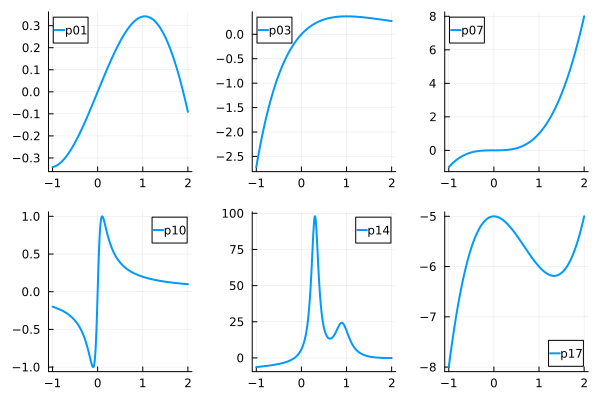

In [3]:
plots = []
for i in 1:6
    push!(plots, plot(test_functions[i], -1, 2, label=function_names[i], linewidth=2))
end
plot(plots...)

### podp. 1.

In [4]:
test_results = DataFrame(methodName = String[], functionName = String[], argument = Float32[], value = Float32[], isZero = Bool[], iterations= Int64[], functionCalls = Int64[])

Row,methodName,functionName,argument,value,isZero,iterations,functionCalls
,String,String,Float32,Float32,Bool,Int64,Int64


In [5]:
tracker = Roots.Tracks()

Algorithm has not been run

#### Regula falsi

In [6]:
bracketing_intervals = [(-1, 1.1),
    (-1, 1.1),
    (-1, 1.1),
    (-1, 1.1),
    (-1, 1),
    (-1, 3)]

for i in 1:6    
    empty!(tracker)
    
    f = test_functions[i]
    
    x = find_zero(f, bracketing_intervals[i], FalsePosition(), tracks=tracker, verbose=true, maxiters=100)
    println(f(x))
    println(f(prevfloat(x)))
    println(f(nextfloat(x)))
    println()
    
    # preparing row to insert it into the data frame
    data_row = ["regula falsi",
        function_names[i],
        x,
        f(x),
        iszero(f(x)) || f(prevfloat(x)) * f(x) <= 0.0 || f(x) * f(nextfloat(x)) <= 0.0,
        tracker.steps,
        tracker.fncalls]
    push!(test_results, data_row)
end;
test_results

Results of univariate zero finding:

* Converged to: 9.769962616701378e-16
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 50
* function evaluations ≈ 52
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0,	 fx₁ = 0
x₂ = 1.1000000000000001,	 fx₂ = 0.34120736006143537
x₃ = 0.55000000000000004,	 fx₃ = 0.2476872289306592
x₄ = 0.27500000000000002,	 fx₄ = 0.13404693695611286
x₅ = 0.13750000000000001,	 fx₅ = 0.068317141160385425
x₆ = 0.068750000000000006,	 fx₆ = 0.034320854269097409
x₇ = 0.034375000000000003,	 fx₇ = 0.017180730583882503
x₈ = 0.017187500000000001,	 fx₈ = 0.0085929037854890235
x₉ = 0.0085937500000000007,	 fx₉ = 0.0042967692220143381
x₁₀ = 0.0042968750000000003,	 fx₁₀ = 0.0021484242777151741
x₁₁ = 0.0021484375000000002,	 fx₁₁ = 0.0010742170972132523
x₁₂ = 0.0010742187500000001,	 fx₁₂ = 0.0005371091684016208
x₁₃ = 0.00053710937500000004,	 fx₁₃ = 0.00026855466167520145
x₁₄ = 0.00026855468750000002,	 fx₁₄ = 0.00013427734052190015
x₁₅ = 0.00013

4.884981308350689e-16
4.884981308350688e-16
4.88498130835069e-16



Results of univariate zero finding:

* Converged to: 4.884981308350689e-16
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 51
* function evaluations ≈ 53
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0,	 fx₁ = 0
x₂ = 1.1000000000000001,	 fx₂ = 0.36615819206788752
x₃ = 0.55000000000000004,	 fx₃ = 0.31732239570926768
x₄ = 0.27500000000000002,	 fx₄ = 0.20888233388686636
x₅ = 0.13750000000000001,	 fx₅ = 0.11983597312460921
x₆ = 0.068750000000000006,	 fx₆ = 0.064182252813051385
x₇ = 0.034375000000000003,	 fx₇ = 0.033213438097016101
x₈ = 0.017187500000000001,	 fx₈ = 0.016894614042535335
x₉ = 0.0085937500000000007,	 fx₉ = 0.0085202138889830126
x₁₀ = 0.0042968750000000003,	 fx₁₀ = 0.0042784514753718946
x₁₁ = 0.0021484375000000002,	 fx₁₁ = 0.002143826671120978
x₁₂ = 0.0010742187500000001,	 fx₁₂ = 0.0010730654236504496
x₁₃ = 0.00053710937500000004,	 fx₁₃ = 0.00053682096597981494
x₁₄ = 0.00026855468750000002,	 fx₁₄ = 0.00026848257556325451
x₁₅ = 0.0001342

4.884981308350687e-16
4.884981308350686e-16
4.884981308350688e-16



Results of univariate zero finding:

* Converged to: 8.392333984375e-6
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 17
* function evaluations ≈ 19
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0,	 fx₁ = 0
x₂ = 1.1000000000000001,	 fx₂ = 1.3310000000000004
x₃ = 0.55000000000000004,	 fx₃ = 0.16637500000000005
x₄ = 0.27500000000000002,	 fx₄ = 0.020796875000000006
x₅ = 0.13750000000000001,	 fx₅ = 0.0025996093750000008
x₆ = 0.068750000000000006,	 fx₆ = 0.0003249511718750001
x₇ = 0.034375000000000003,	 fx₇ = 4.0618896484375012e-05
x₈ = 0.017187500000000001,	 fx₈ = 5.0773620605468765e-06
x₉ = 0.0085937500000000007,	 fx₉ = 6.3467025756835957e-07
x₁₀ = 0.0042968750000000003,	 fx₁₀ = 7.9333782196044946e-08
x₁₁ = 0.0021484375000000002,	 fx₁₁ = 9.9167227745056183e-09
x₁₂ = 0.0010742187500000001,	 fx₁₂ = 1.2395903468132023e-09
x₁₃ = 0.00053710937500000004,	 fx₁₃ = 1.5494879335165029e-10
x₁₄ = 0.00026855468750000002,	 fx₁₄ = 1.9368599168956286e-11
x₁₅ = 0

5.910827383104335e-16
5.910827383104331e-16
5.910827383104338e-16



Results of univariate zero finding:

* Converged to: 1.2212453270876723e-16
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 53
* function evaluations ≈ 55
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol

Trace:
x₁ = 0,	 fx₁ = 0
x₂ = 1.1000000000000001,	 fx₂ = 0.18032786885245899
x₃ = 0.55000000000000004,	 fx₃ = 0.35199999999999998
x₄ = 0.27500000000000002,	 fx₄ = 0.64233576642335766
x₅ = 0.13750000000000001,	 fx₅ = 0.9513513513513514
x₆ = 0.068750000000000006,	 fx₆ = 0.93368700265251992
x₇ = 0.034375000000000003,	 fx₇ = 0.61484716157205244
x₈ = 0.017187500000000001,	 fx₈ = 0.333886649276737
x₉ = 0.0085937500000000007,	 fx₉ = 0.17061496516207211
x₁₀ = 0.0042968750000000003,	 fx₁₀ = 0.085779124845789478
x₁₁ = 0.0021484375000000002,	 fx₁₁ = 0.042948925704916784
x₁₂ = 0.0010742187500000001,	 fx₁₂ = 0.021481896105357411
x₁₃ = 0.00053710937500000004,	 fx₁₃ = 0.010741877611353165
x₁₄ = 0.00026855468750000002,	 fx₁₄ = 0.0053710550130810393
x₁₅ = 0.00013427734375000001,	 fx₁

2.4424906541753444e-15
2.442490654175344e-15
2.442490654175345e-15



Results of univariate zero finding:

* Converged to: -0.15348049481269918
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 8
* function evaluations ≈ 10
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -1,	 fx₁ = -6.3377921031426272
x₂ = 0,	 fx₂ = 5.9764705882352933
x₃ = -0.48532914539981675,	 fx₃ = -4.0646762082302557
x₄ = -0.28886694138525704,	 fx₄ = -2.28672299321578
x₅ = -0.15408449445856484,	 fx₅ = -0.013927818264750869
x₆ = -0.153262943788258,	 fx₆ = 0.0050277702778158684
x₇ = -0.15348085145346252,	 fx₇ = -8.2373657734891026e-06
x₈ = -0.15348049502327613,	 fx₈ = -4.8637227578751663e-09
x₉ = -0.15348049481269907,	 fx₉ = 2.6645352591003757e-15
x₁₀ = -0.15348049481269918,	 fx₁₀ = -8.8817841970012523e-16



-8.881784197001252e-16
-1.7763568394002505e-15
-8.881784197001252e-16



Results of univariate zero finding:

* Converged to: 2.690647448028614
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 8
* function evaluations ≈ 10
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0,	 fx₁ = -5
x₂ = 3,	 fx₂ = 4
x₃ = 1.6666666666666667,	 fx₃ = -5.9259259259259256
x₄ = 2.4626865671641793,	 fx₄ = -2.1938868810325722
x₅ = 2.712803601042407,	 fx₅ = 0.24573794887981038
x₆ = 2.6876098720183648,	 fx₆ = -0.033224175675012901
x₇ = 2.6906104258761303,	 fx₇ = -0.00040561235102209992
x₈ = 2.6906474485632148,	 fx₈ = 5.8571760774839277e-09
x₉ = 2.6906474480286029,	 fx₉ = -1.2079226507921703e-13
x₁₀ = 2.690647448028614,	 fx₁₀ = 1.7763568394002505e-15



1.7763568394002505e-15
-1.7763568394002505e-15
7.105427357601002e-15



Row,methodName,functionName,argument,value,isZero,iterations,functionCalls
,String,String,Float32,Float32,Bool,Int64,Int64
1,regula falsi,p01,9.76996e-16,4.88498e-16,false,50,52
2,regula falsi,p03,4.88498e-16,4.88498e-16,false,51,53
3,regula falsi,p07,8.39233e-6,5.91083e-16,false,17,19
4,regula falsi,p10,1.22125e-16,2.44249e-15,false,53,55
5,regula falsi,p14,-0.15348,-8.88178e-16,false,8,10
6,regula falsi,p17,2.69065,1.77636e-15,true,8,10


#### Metoda Halleya

In [7]:
first_derrivatives = [x->ForwardDiff.derivative(test_functions[i], float(x)) for i in 1:6]
second_derrivatives = [x->ForwardDiff.derivative(first_derrivatives[i], float(x)) for i in 1:6]

starting_arguments = [-1,
    -1,
    -1,
    -1,
    -1,
    -1]

for i in 1:6    
    empty!(tracker)
    
    f = test_functions[i]
    df = first_derrivatives[i]
    ddf = second_derrivatives[i]

    x = find_zero((f, df, ddf), starting_arguments[i], Roots.Halley(), tracks=tracker, verbose=true, maxiters=100)

    # preparing row to insert it into the data frame
    data_row = ["Halley's method",
        function_names[i],
        x,
        f(x),
        iszero(f(x)) || f(prevfloat(x)) * f(x) < 0.0 || f(x) * f(nextfloat(x)) < 0.0,
        tracker.steps,
        tracker.fncalls]
    push!(test_results, data_row)
end;

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Halley()
* iterations: 6
* function evaluations ≈ 21
* stopped as f(x_n) = 0

Trace:
x₁ = -1,	 fx₁ = -0.3414709848078965
x₂ = -0.90528073990820657,	 fx₂ = -0.33395816299829562
x₃ = -0.63500802746297946,	 fx₃ = -0.27567996328845012
x₄ = -0.15396532581439731,	 fx₄ = -0.076375083904521468
x₅ = -0.001266240754516923,	 fx₅ = -0.00063312003888400044
x₆ = -6.7675082096423089e-10,	 fx₆ = -3.3837541048211545e-10
x₇ = 0,	 fx₇ = 0



Results of univariate zero finding:

* Converged to: -3.308722450212111e-24
* Algorithm: Roots.Halley()
* iterations: 4
* function evaluations ≈ 15
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -1,	 fx₁ = -2.7182818284590451
x₂ = -0.19999999999999996,	 fx₂ = -0.24428055163203391
x₃ = -0.0032786885245901787,	 fx₃ = -0.0032894559649273452
x₄ = -1.7564936031274486e-08,	 fx₄ = -1.7564936339801466e-08
x₅ = -3.3087224502121107e-24,	 fx₅ = -3.3087224502121107e-24



Results of univariate zero finding:

* Converged to: -7.629394531250002e-6
* Algorithm: Roots.Halley()
* iterations: 17
* function evaluations ≈ 54
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -1,	 fx₁ = -1
x₂ = -0.50000000000000011,	 fx₂ = -0.12500000000000008
x₃ = -0.25,	 fx₃ = -0.015625
x₄ = -0.12500000000000003,	 fx₄ = -0.0019531250000000013
x₅ = -0.0625,	 fx₅ = -0.000244140625
x₆ = -0.031250000000000007,	 fx₆ = -3.051757812500002e-05
x₇ = -0.015625,	 fx₇ = -3.814697265625e-06
x₈ = -0.0078125000000000017,	 fx₈ = -4.7683715820312532e-07
x₉ = -0.00390625,	 fx₉ = -5.9604644775390625e-08
x₁₀ = -0.0019531250000000004,	 fx₁₀ = -7.4505805969238331e-09
x₁₁ = -0.0009765625,	 fx₁₁ = -9.3132257461547852e-10
x₁₂ = -0.00048828125000000011,	 fx₁₂ = -1.1641532182693489e-10
x₁₃ = -0.000244140625,	 fx₁₃ = -1.4551915228366852e-11
x₁₄ = -0.00012207031250000003,	 fx₁₄ = -1.8189894035458577e-12
x₁₅ = -6.103515625e-05,	 fx₁₅ = -2.2737367544323206e-13
x₁₆ = -3.0517578125000

Results of univariate zero finding:

* Converged to: -1.0000000001660924e8
* Algorithm: Roots.Halley()
* iterations: 2
* function evaluations ≈ 9
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -1,	 fx₁ = -0.19801980198019803
x₂ = -100.00000000000756,	 fx₂ = -0.001999998000001849
x₃ = -100000000.01660924,	 fx₃ = -1.9999999996678151e-09



Results of univariate zero finding:

* Converged to: -0.15348049481269915
* Algorithm: Roots.Halley()
* iterations: 5
* function evaluations ≈ 18
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -1,	 fx₁ = -6.3377921031426272
x₂ = 0.11660606064633638,	 fx₂ = 19.481207930778655
x₃ = -0.099372133365391163,	 fx₃ = 1.4637273452129929
x₄ = -0.15341636226368477,	 fx₄ = 0.0014815349206127593
x₅ = -0.15348049481265966,	 fx₅ = 9.1215923703202861e-13
x₆ = -0.15348049481269915,	 fx₆ = -8.8817841970012523e-16



Results of univariate zero finding:

* Converged to: 2.6906474480286136
* Algorithm: Roots.Halley()
* iterations: 5
* function evaluations ≈ 18
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -1,	 fx₁ = -8
x₂ = 5.2222222222222223,	 fx₂ = 82.875171467764062
x₃ = 3.2646499782318683,	 fx₃ = 8.478562931845655
x₄ = 2.7148670738760412,	 fx₄ = 0.26893007617779219
x₅ = 2.6906504445172836,	 fx₅ = 3.2830067651090644e-05
x₆ = 2.6906474480286136,	 fx₆ = -1.7763568394002505e-15



#### Metoda siecznych

In [8]:
starting_arguments = [-1,
    -1,
    -1,
    -1,
    -1,
    -1]

for i in 1:6    
    empty!(tracker)
    
    f = test_functions[i]
    df = second_derrivatives[i]
    ddf = second_derrivatives[i]

    x = find_zero(f, starting_arguments[i], Order1(), tracks=tracker, verbose=true, maxiters=100) 
    
    # preparing row to insert it into the data frame
    data_row = ["secant method",
        function_names[i],
        x,
        f(x),
        iszero(f(x)) || f(prevfloat(x)) * f(x) < 0.0 || f(x) * f(nextfloat(x)) < 0.0,
        tracker.steps,
        tracker.fncalls]
    push!(test_results, data_row)
end;

Results of univariate zero finding:

* Converged to: -1.895494267033981
* Algorithm: Secant()
* iterations: 10
* function evaluations ≈ 12
* stopped as f(x_n) = 0

Trace:
x₁ = -0.99999394450887913,	 fx₁ = -0.34147074074221323
x₂ = -1,	 fx₂ = -0.3414709848078965
x₃ = 7.4722050588805011,	 fx₃ = -2.8080983271190343
x₄ = -2.1728614839077096,	 fx₄ = 0.26226296161098017
x₅ = -1.3490028306177893,	 fx₅ = -0.30100307068744014
x₆ = -1.7892636846955341,	 fx₆ = -0.081598928572225504
x₇ = -1.9530017693036719,	 fx₇ = 0.048656550683427002
x₈ = -1.8918378899945612,	 fx₈ = -0.0029883173001923335
x₉ = -1.895377004059956,	 fx₉ = -9.6034500840391779e-05
x₁₀ = -1.8954945157544429,	 fx₁₀ = 2.0370768993860366e-07
x₁₁ = -1.8954942670171047,	 fx₁₁ = -1.3822054611978274e-11
x₁₂ = -1.8954942670339809,	 fx₁₂ = 0



Results of univariate zero finding:

* Converged to: -8.041069570498994e-19
* Algorithm: Secant()
* iterations: 9
* function evaluations ≈ 11
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -0.99999394450887913,	 fx₁ = -2.7182489075456076
x₂ = -1,	 fx₂ = -2.7182818284590451
x₃ = -0.49999772917938456,	 fx₃ = -0.82435501943531553
x₄ = -0.28236556952243452,	 fx₄ = -0.3744911408566633
x₅ = -0.10119673237432958,	 fx₅ = -0.11197360791550243
x₆ = -0.023921404856010159,	 fx₆ = -0.024500537685391389
x₇ = -0.0022771768778110241,	 fx₇ = -0.0022823683210177101
x₈ = -5.3766863233548241e-05,	 fx₈ = -5.3769754186848261e-05
x₉ = -1.2229407706052398e-07,	 fx₉ = -1.222940920163662e-07
x₁₀ = -6.5751917481966653e-12,	 fx₁₀ = -6.5751917482398984e-12
x₁₁ = -8.0410695704989936e-19,	 fx₁₁ = -8.0410695704989936e-19



Results of univariate zero finding:

* Converged to: -8.971730607213444e-6
* Algorithm: Secant()
* iterations: 41
* function evaluations ≈ 43
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -0.99999394450887913,	 fx₁ = -0.99998183363664406
x₂ = -1,	 fx₂ = -1
x₃ = -0.66666464816194848,	 fx₃ = -0.29629360496482077
x₄ = -0.52631473269276219,	 fx₄ = -0.14579296929010632
x₅ = -0.39035496864170632,	 fx₅ = -0.05948111965913943
x₆ = -0.29665938652956308,	 fx₆ = -0.026108040811266348
x₇ = -0.22336054308841941,	 fx₇ = -0.011143442352791647
x₈ = -0.16877829427771934,	 fx₈ = -0.0048078374984878679
x₉ = -0.12735800550992871,	 fx₉ = -0.0020657546904808487
x₁₀ = -0.096153931164222189,	 fx₁₀ = -0.00088899871657913956
x₁₁ = -0.072580324859598311,	 fx₁₁ = -0.00038234615147612113
x₁₂ = -0.054790465954702647,	 fx₁₂ = -0.00016448071358459853
x₁₃ = -0.041359750575682815,	 fx₁₃ = -7.0751187430894035e-05
x₁₄ = -0.03122165322145367,	 fx₁₄ = -3.0434606231311089e-05
x₁₅ = -0.023568499

Results of univariate zero finding:

* Converged to: -1.5127897645171314e7
* Algorithm: Secant()
* iterations: 34
* function evaluations ≈ 36
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -0.99999394450887913,	 fx₁ = -0.1980209773495592
x₂ = -1,	 fx₂ = -0.19801980198019803
x₃ = -2.0201960271036463,	 fx₃ = -0.098758309708564321
x₄ = -3.0352204127176963,	 fx₄ = -0.065821625245166049
x₅ = -5.0636745760029491,	 fx₅ = -0.039481610976810293
x₆ = -8.1041679236217341,	 fx₆ = -0.024674902434027441
x₇ = -13.171052065159824,	 fx₇ = -0.015183940564774831
x₈ = -21.277213349292445,	 fx₈ = -0.0093995195268700878
x₉ = -34.449494685466099,	 fx₉ = -0.0058055514773277484
x₁₀ = -55.727468311508147,	 fx₁₀ = -0.0035888828625041782
x₁₁ = -90.177432724161775,	 fx₁₁ = -0.0022178470601307253
x₁₂ = -145.90519137345797,	 fx₁₂ = -0.0013707525014645735
x₁₃ = -236.08280352790268,	 fx₁₃ = -0.00084716023838785038
x₁₄ = -381.98810579706969,	 fx₁₄ = -0.00052357647596397222
x₁₅ = -618.070977

Results of univariate zero finding:

* Converged to: -0.15348049481269913
* Algorithm: Secant()
* iterations: 12
* function evaluations ≈ 14
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -0.99999394450887913,	 fx₁ = -6.3377728170494647
x₂ = -1,	 fx₂ = -6.3377921031426272
x₃ = 0.98995428898786675,	 fx₃ = 19.630942278271313
x₄ = -0.51434227047319792,	 fx₄ = -4.2530302866220238
x₅ = -0.24647147092064503,	 fx₅ = -1.7144923989098166
x₆ = -0.065555341228113378,	 fx₆ = 2.6596809956387837
x₇ = -0.1755599406222359,	 fx₇ = -0.48111223462105723
x₈ = -0.15870924248547191,	 fx₈ = -0.11907865817746544
x₉ = -0.15316677721694449,	 fx₉ = 0.0072521470715338765
x₁₀ = -0.1534849480161174,	 fx₁₀ = -0.00010285492107708905
x₁₁ = -0.1534804986043469,	 fx₁₁ = -8.757613390031338e-08
x₁₂ = -0.15348049481265333,	 fx₁₂ = 1.0595968547022494e-12
x₁₃ = -0.15348049481269921,	 fx₁₃ = -1.7763568394002505e-15
x₁₄ = -0.15348049481269913,	 fx₁₄ = -8.8817841970012523e-16



Results of univariate zero finding:

* Converged to: 2.690647448028614
* Algorithm: Secant()
* iterations: 13
* function evaluations ≈ 15
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -0.99999394450887913,	 fx₁ = -7.9999576117454989
x₂ = -1,	 fx₂ = -8
x₃ = 0.14286208614041795,	 fx₃ = -5.0379033967572715
x₄ = 2.0866301521409669,	 fx₄ = -4.6228101178806682
x₅ = 23.733983023378102,	 fx₅ = 12237.79502168281
x₆ = 2.0948043219212664,	 fx₆ = -4.5839791865739787
x₇ = 2.1029067948781148,	 fx₇ = -4.5449238235150755
x₈ = 3.0458021999324059,	 fx₈ = 4.7018139753732875
x₉ = 2.5663554059146829,	 fx₉ = -1.269881313329531
x₁₀ = 2.6683097915663851,	 fx₁₀ = -0.24171639006943835
x₁₁ = 2.6922787536404225,	 fx₁₁ = 0.017889010113556481
x₁₂ = 2.6906270892118256,	 fx₁₂ = -0.00022305196343452849
x₁₃ = 2.690647429634256,	 fx₁₃ = -2.0153154878244095e-07
x₁₄ = 2.6906474480288214,	 fx₁₄ = 2.2737367544323206e-12
x₁₅ = 2.690647448028614,	 fx₁₅ = 1.7763568394002505e-15



#### Zestawienie rezultatów

In [9]:
test_results

Row,methodName,functionName,argument,value,isZero,iterations,functionCalls
,String,String,Float32,Float32,Bool,Int64,Int64
1,regula falsi,p01,9.76996e-16,4.88498e-16,false,50,52
2,regula falsi,p03,4.88498e-16,4.88498e-16,false,51,53
3,regula falsi,p07,8.39233e-6,5.91083e-16,false,17,19
4,regula falsi,p10,1.22125e-16,2.44249e-15,false,53,55
5,regula falsi,p14,-0.15348,-8.88178e-16,false,8,10
6,regula falsi,p17,2.69065,1.77636e-15,true,8,10
7,Halley's method,p01,0.0,0.0,true,6,21
8,Halley's method,p03,-3.30872e-24,-3.30872e-24,false,4,15
9,Halley's method,p07,-7.62939e-6,-4.44089e-16,false,17,54


### podp. 2.

Moją wybranę funkcją będzie funkcja p07 o wzorze $f(x) = x^3$ z uwagi na to, że wydaje się ona bardzo "nieskomplikowanym" wielomianem, z którym poprzednie metody powinny sobie spokojnie poradzić, a jednak tak nie było.

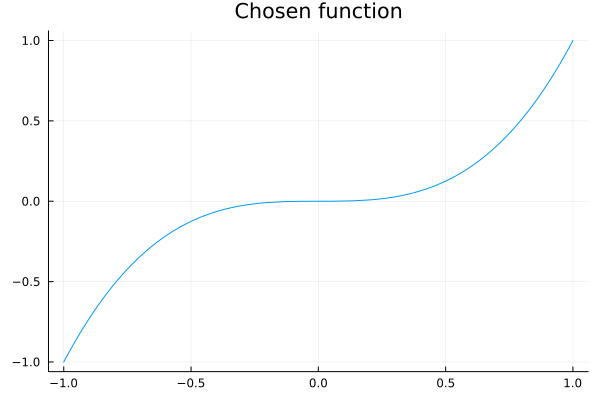

In [10]:
chosen_function = 3

f = test_functions[chosen_function]
df = first_derrivatives[chosen_function]
ddf = second_derrivatives[chosen_function]

p07_results = DataFrame(methodName = String[], argument = Float32[], value = Float32[], iterations= Int64[], functionCalls = Int64[])

plot(f, -1, 1, title="Chosen function", label="")

#### Regula falsi

Results of univariate zero finding:

* Converged to: 7.62939453125e-6
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 17
* function evaluations ≈ 19
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0,	 fx₁ = 0
x₂ = 1,	 fx₂ = 1
x₃ = 0.5,	 fx₃ = 0.125
x₄ = 0.25,	 fx₄ = 0.015625
x₅ = 0.125,	 fx₅ = 0.001953125
x₆ = 0.0625,	 fx₆ = 0.000244140625
x₇ = 0.03125,	 fx₇ = 3.0517578125e-05
x₈ = 0.015625,	 fx₈ = 3.814697265625e-06
x₉ = 0.0078125,	 fx₉ = 4.76837158203125e-07
x₁₀ = 0.00390625,	 fx₁₀ = 5.9604644775390625e-08
x₁₁ = 0.001953125,	 fx₁₁ = 7.4505805969238281e-09
x₁₂ = 0.0009765625,	 fx₁₂ = 9.3132257461547852e-10
x₁₃ = 0.00048828125,	 fx₁₃ = 1.1641532182693481e-10
x₁₄ = 0.000244140625,	 fx₁₄ = 1.4551915228366852e-11
x₁₅ = 0.0001220703125,	 fx₁₅ = 1.8189894035458565e-12
x₁₆ = 6.103515625e-05,	 fx₁₆ = 2.2737367544323206e-13
x₁₇ = 3.0517578125e-05,	 fx₁₇ = 2.8421709430404007e-14
x₁₈ = 1.52587890625e-05,	 fx₁₈ = 3.5527136788005009e-15
x₁₉ = 7.62939453125e-

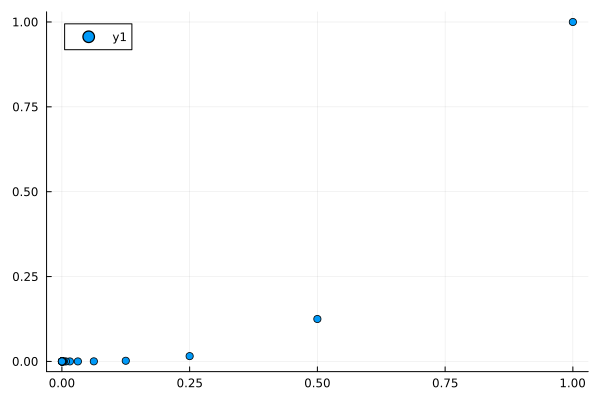

In [11]:
empty!(tracker)
x = find_zero(f, (-1, 1), FalsePosition(), tracks=tracker, verbose = true)
push!(p07_results, ["regula falsi", x, f(x), tracker.steps, tracker.fncalls])

xs = [tracker.xfₛ[i][1] for i in 1:length(tracker.xfₛ)]
ys = [tracker.xfₛ[i][2] for i in 1:length(tracker.xfₛ)]
scatter(xs, ys)

#### Metoda Halleya

Results of univariate zero finding:

* Converged to: -7.629394531250002e-6
* Algorithm: Roots.Halley()
* iterations: 17
* function evaluations ≈ 54
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -1,	 fx₁ = -1
x₂ = -0.50000000000000011,	 fx₂ = -0.12500000000000008
x₃ = -0.25,	 fx₃ = -0.015625
x₄ = -0.12500000000000003,	 fx₄ = -0.0019531250000000013
x₅ = -0.0625,	 fx₅ = -0.000244140625
x₆ = -0.031250000000000007,	 fx₆ = -3.051757812500002e-05
x₇ = -0.015625,	 fx₇ = -3.814697265625e-06
x₈ = -0.0078125000000000017,	 fx₈ = -4.7683715820312532e-07
x₉ = -0.00390625,	 fx₉ = -5.9604644775390625e-08
x₁₀ = -0.0019531250000000004,	 fx₁₀ = -7.4505805969238331e-09
x₁₁ = -0.0009765625,	 fx₁₁ = -9.3132257461547852e-10
x₁₂ = -0.00048828125000000011,	 fx₁₂ = -1.1641532182693489e-10
x₁₃ = -0.000244140625,	 fx₁₃ = -1.4551915228366852e-11
x₁₄ = -0.00012207031250000003,	 fx₁₄ = -1.8189894035458577e-12
x₁₅ = -6.103515625e-05,	 fx₁₅ = -2.2737367544323206e-13
x₁₆ = -3.0517578125000

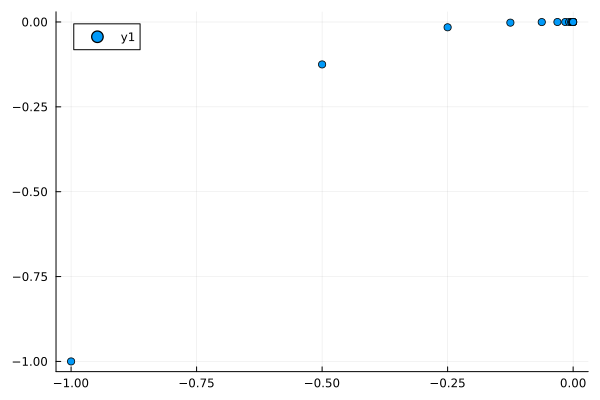

In [12]:
empty!(tracker)
find_zero((f, df, ddf), -1, Roots.Halley(), tracks=tracker, verbose=true)
push!(p07_results, ["Halley's method", x, f(x), tracker.steps, tracker.fncalls])

xs = [tracker.xfₛ[i][1] for i in 1:length(tracker.xfₛ)]
ys = [tracker.xfₛ[i][2] for i in 1:length(tracker.xfₛ)]
scatter(xs, ys)

#### Metoda siecznych

Results of univariate zero finding:

* Converged to: -1.1885012642937958e-5
* Algorithm: Secant()
* iterations: 40
* function evaluations ≈ 42

Trace:
x₁ = -0.99999394450887913,	 fx₁ = -0.99998183363664406
x₂ = -1,	 fx₂ = -1
x₃ = -0.66666464816194848,	 fx₃ = -0.29629360496482077
x₄ = -0.52631473269276219,	 fx₄ = -0.14579296929010632
x₅ = -0.39035496864170632,	 fx₅ = -0.05948111965913943
x₆ = -0.29665938652956308,	 fx₆ = -0.026108040811266348
x₇ = -0.22336054308841941,	 fx₇ = -0.011143442352791647
x₈ = -0.16877829427771934,	 fx₈ = -0.0048078374984878679
x₉ = -0.12735800550992871,	 fx₉ = -0.0020657546904808487
x₁₀ = -0.096153931164222189,	 fx₁₀ = -0.00088899871657913956
x₁₁ = -0.072580324859598311,	 fx₁₁ = -0.00038234615147612113
x₁₂ = -0.054790465954702647,	 fx₁₂ = -0.00016448071358459853
x₁₃ = -0.041359750575682815,	 fx₁₃ = -7.0751187430894035e-05
x₁₄ = -0.03122165322145367,	 fx₁₄ = -3.0434606231311089e-05
x₁₅ = -0.023568499314796213,	 fx₁₅ = -1.3091692358205097e-05
x₁₆ = -0.0177913423

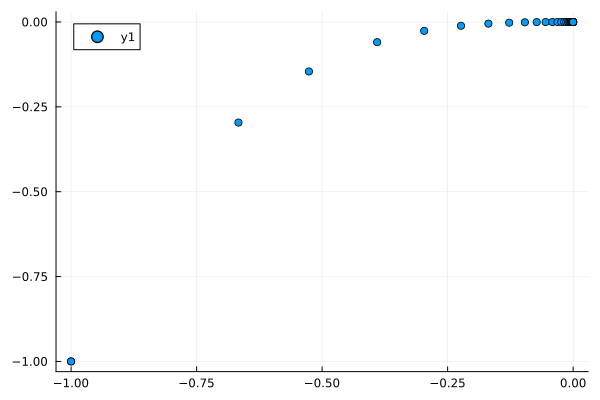

In [13]:
empty!(tracker)
find_zero(f, -1, Order1(), tracks=tracker, verbose=true) 
push!(p07_results, ["secant method", x, f(x), tracker.steps, tracker.fncalls])

xs = [tracker.xfₛ[i][1] for i in 1:length(tracker.xfₛ)]
ys = [tracker.xfₛ[i][2] for i in 1:length(tracker.xfₛ)]
scatter(xs, ys)

#### Wyniki i wnioski

In [14]:
p07_results

Row,methodName,argument,value,iterations,functionCalls
,String,Float32,Float32,Int64,Int64
1,regula falsi,7.62939e-6,4.44089e-16,17,19
2,Halley's method,7.62939e-6,4.44089e-16,17,54
3,secant method,7.62939e-6,4.44089e-16,40,42


Zauważmy, że mimo pozornie trywialnej postaci wielomianu $f(x) = x^3$ zarówno metoda Haleya jak i metoda siecznych musiały przejść wiele iteracji (znacznie więcej niż dla innych funkcji, co widać w tabelce z podp. 1), aby dotrzeć do miejsca zerowego. Regula falsi okazała się w tym przypadku zwycięska, gdyż:
* wymagała tyle samo iteracji co metoda Halleya przy równocześnie trzykrotnie niższej liczbie wywołań funkcji
* wymagała mniej zarówno iteracji jak i wywołań funkcji w porównaniu do metody siecznych

### podp. 3.

#### Regula falsi

Wybrana funkcja: $f(x) = \frac{1}{x-1}$

Z powodu nieciągłości funkcji dla $x=1$ metoda ta zawodzi

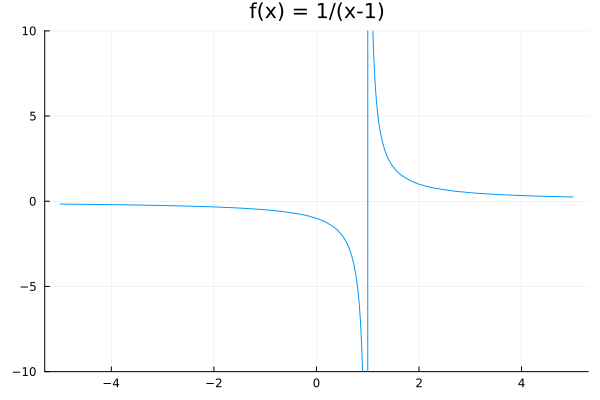

In [15]:
f = x -> 1/(x-1)
plot(f, title="f(x) = 1/(x-1)", label="", ylim=(-10, 10))

In [16]:
x = find_zero(f, (-1, 2), FalsePosition(), verbose = true)

Results of univariate zero finding:

* Convergence failed: 
* Algorithm FalsePosition{:anderson_bjork}()

Trace:
x₁ = 0,	 fx₁ = -1
x₂ = 2,	 fx₂ = 1
x₃ = 1,	 fx₃ = Inf



LoadError: Roots.ConvergenceFailed("Algorithm failed to converge")

#### Metoda Halleya

Wybrana funkcja: $f(x) = \frac{20x}{100x^2 + 1}$

Funkcja ta "odpycha" dopasowywane hiperbole, czego skutkiem jest "ucieczka" punktu do $\pm\infty$

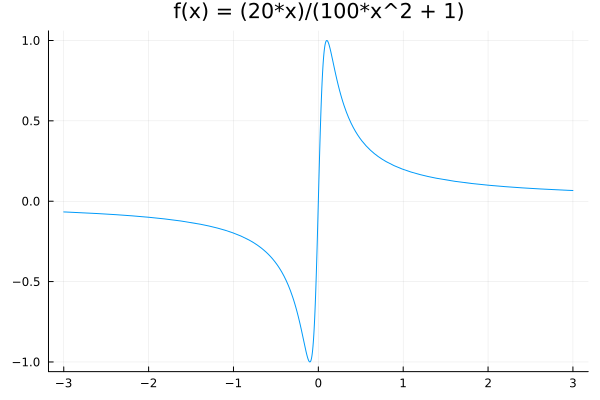

In [17]:
f = x -> (20*x)/(100*x^2 + 1)
df = x -> ForwardDiff.derivative(f, float(x))
ddf = x -> ForwardDiff.derivative(df, float(x))

plot(f, -3, 3, title="f(x) = (20*x)/(100*x^2 + 1)", label="")

In [18]:
find_zero((f, df, ddf), -1, Roots.Halley(), verbose=true)

Results of univariate zero finding:

* Converged to: -1.0000000001660924e8
* Algorithm: Roots.Halley()
* iterations: 2
* function evaluations ≈ 9
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -1,	 fx₁ = -0.19801980198019803
x₂ = -100.00000000000756,	 fx₂ = -0.001999998000001849
x₃ = -100000000.01660924,	 fx₃ = -1.9999999996678151e-09



-1.0000000001660924e8

#### Metoda siecznych

Wybrana funkcja: $f(x) = \frac{1}{x}$

W tym przykładzie jasno widać, że to, czy metoda zbiegnie do pierwiastka, zależy od wyboru punktu początkowego. Metoda może zacząć "uciekać" do $\pm\infty$ lub zacznie oscylować między zbiorem punktów, natomiast dla innych punktów pierwiastek zostanie odnaleziony poprawnie.

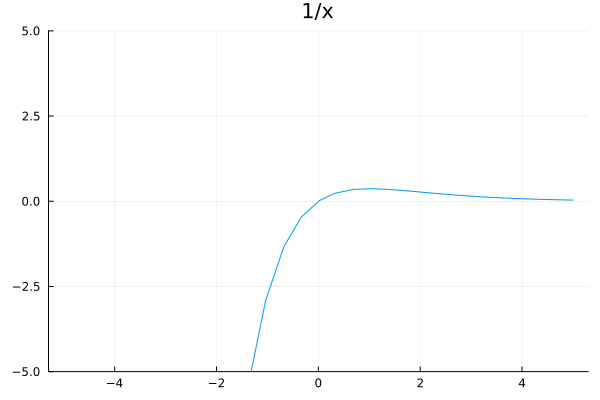

In [39]:
f = x ->  x * exp(-x)
plot(f, title="1/x", label="", ylim=(-5, 5))

In [51]:
# poprawnie
find_zero(f, 0.8, Order1(), verbose=true)

Results of univariate zero finding:

* Converged to: -6.095595893607281e-19
* Algorithm: Secant()
* iterations: 19
* function evaluations ≈ 21
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0.80000605548378723,	 fx₁ = 0.35946371546474293
x₂ = 0.80000000000000004,	 fx₂ = 0.35946317129377725
x₃ = -3.2000726667753892,	 fx₃ = -78.51158430699013
x₄ = 0.78176924420078775,	 fx₄ = 0.35773424153823435
x₅ = 0.76370846692816863,	 fx₅ = 0.35583874388797304
x₆ = -2.6268123799023471,	 fx₆ = -36.327806530368427
x₇ = 0.730819732173424,	 fx₇ = 0.3519000170400633
x₈ = 0.69860707540294043,	 fx₈ = 0.34740157410281974
x₉ = -1.7890820704233783,	 fx₉ = -10.705790345957933
x₁₀ = 0.6204190613533469,	 fx₁₀ = 0.33361115019542686
x₁₁ = 0.54760384177379717,	 fx₁₁ = 0.31669788246484348
x₁₂ = -0.81584798902511113,	 fx₁₂ = -1.8447075578408589
x₁₃ = 0.34782535523692815,	 fx₁₃ = 0.24564198879267754
x₁₄ = 0.21107930955767606,	 fx₁₄ = 0.17091299536341173
x₁₅ = -0.10167314700077057,	 fx₁₅ = -0

-6.095595893607281e-19

In [65]:
# odbijamy się
find_zero(f, 0.96, Order1(), verbose=true)

Results of univariate zero finding:

* Convergence failed: 
* Algorithm Secant()

Trace:
x₁ = 0.96000605548965412,	 fx₁ = 0.36757726327296297
x₂ = 0.95999999999999996,	 fx₂ = 0.36757717053610756
x₃ = -23.041889467501537,	 fx₃ = -234144271714.15491
x₄ = 0.95999999996232077,	 fx₄ = 0.36757717053553046
x₅ = 0.9599999999246408,	 fx₅ = 0.36757717053495337
x₆ = -23.04007377557139,	 fx₆ = -233701106564.51535
x₇ = 0.95999999988688955,	 fx₇ = 0.36757717053437516
x₈ = 0.95999999984914097,	 fx₈ = 0.36757717053379702
x₉ = -23.039912852004107,	 fx₉ = -233661869550.1438
x₁₀ = 0.95999999981138728,	 fx₁₀ = 0.36757717053321881
x₁₁ = 0.9599999997736326,	 fx₁₁ = 0.36757717053264055
x₁₂ = -23.039186506900435,	 fx₁₂ = -233484851055.61417
x₁₃ = 0.95999999973584949,	 fx₁₃ = 0.3675771705320619
x₁₄ = 0.95999999969806737,	 fx₁₄ = 0.3675771705314832
x₁₅ = -23.038187910275955,	 fx₁₅ = -233241700321.74411
x₁₆ = 0.95999999966024774,	 fx₁₆ = 0.367577170530904
x₁₇ = 0.95999999962242777,	 fx₁₇ = 0.36757717053032474
x₁

LoadError: Roots.ConvergenceFailed("Algorithm failed to converge")

In [59]:
# uciekamy do plus nieskończoności
find_zero(f, 1, Order1(), verbose=true)

Results of univariate zero finding:

* Converged to: 330279.65386952134
* Algorithm: Secant()
* iterations: 1
* function evaluations ≈ 3
* stopped as f(x_n) = 0

Trace:
x₁ = 1.000006055491121,	 fx₁ = 0.36787944116469745
x₂ = 1,	 fx₂ = 0.36787944117144233
x₃ = 330279.65386952134,	 fx₃ = 0



330279.65386952134

## Zadanie B

In [21]:
#Pkg.add("Symbolics")
using Symbolics, Plots

f = x-> sin(x) / cos(x)

function get_map(f)
    # define variable
    @variables x
    # define derivative operator
    Dx = Differential(x)
    map = x - f(x) / Dx(f(x)) |> expand_derivatives
    # now we expand and compile to a Julia function
    update_expr = build_function(map, x)
    return eval(update_expr)
end

update = get_map(f)

function apply_iteratively(x, update; n=100)
    for i in 1:n
        x = update(x)
    end
    return x
end

apply_iteratively (generic function with 1 method)

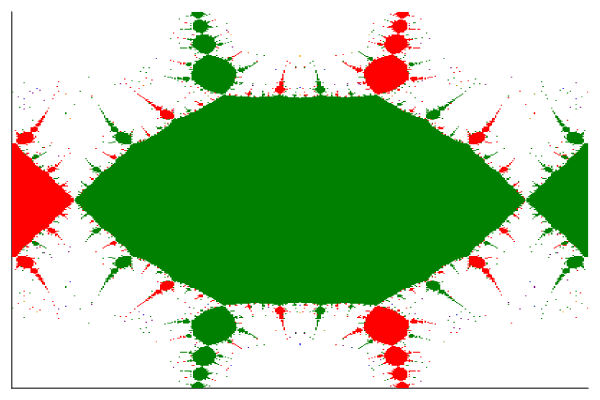

In [22]:
lower = -2 - 2im
upper = 2 + 2im

step = 1e-2

# generate a range of complex values
Z0 = [a+b*im for b in real(lower):step:real(upper),
                    a in imag(lower):step:imag(upper)]

# apply the update 100 times
Z100 = apply_iteratively.(Z0, update)


heatmap(angle.(Z100), colorbar=false, color=:rainbow, ticks=false)

Fraktal Newtona powstaje przez wielokrotne stosowanie schematu Newtona $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$ dla argumentów (dla odmiany - zespolonych) jakiejś funkcji. (Prawie) każdy punkt będzie zdążał do któregoś pierwiastka tej funkcji (także do pierw. zespolonych). Efekt tego procesu można zwizualizować, nadając każdemu punktowi końcowemu kolor w zależności od argumentu liczby zespolonej (kąt).